In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_articles = pd.read_csv("../data/h-and-m-personalized-fashion-recommendations/articles.csv")
df_customers = pd.read_csv("../data/h-and-m-personalized-fashion-recommendations/customers.csv")
df_sample = pd.read_csv("../data/h-and-m-personalized-fashion-recommendations/sample_submission.csv")
df_transactions = pd.read_csv("../data/h-and-m-personalized-fashion-recommendations/transactions_train.csv")

In [5]:
df_articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [25]:
print(df_articles.columns)

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')


In [31]:
print(list(df_articles.perceived_colour_value_name.unique()))
print(list(df_articles.perceived_colour_master_name.unique()))

['Dark', 'Light', 'Dusty Light', 'Medium Dusty', 'Bright', 'Medium', 'Undefined', 'Unknown']
['Black', 'White', 'Beige', 'Grey', 'Blue', 'Pink', 'Lilac Purple', 'Red', 'Mole', 'Orange', 'Metal', 'Brown', 'Turquoise', 'Yellow', 'Khaki green', 'Green', 'undefined', 'Unknown', 'Yellowish Green', 'Bluish Green']


In [7]:
df_articles.detail_desc

0                   Jersey top with narrow shoulder straps.
1                   Jersey top with narrow shoulder straps.
2                   Jersey top with narrow shoulder straps.
3         Microfibre T-shirt bra with underwired, moulde...
4         Microfibre T-shirt bra with underwired, moulde...
                                ...                        
105537    Socks in a fine-knit cotton blend with a small...
105538    Loose-fitting sports vest top in ribbed fast-d...
105539    Short, A-line dress in jersey with a round nec...
105540                             Large plastic hair claw.
105541    Calf-length dress in ribbed jersey made from a...
Name: detail_desc, Length: 105542, dtype: object

In [20]:
print(df_articles.prod_name.nunique())
#print(df_articles.prod_name.unique())
#print(list(df_articles.prod_name))
print(df_articles.prod_name)

45875
['Strap top' 'Strap top (1)' 'OP T-shirt (Idro)' ... 'Cartwheel dress'
 'CLAIRE HAIR CLAW' 'Lounge dress']
0                      Strap top
1                      Strap top
2                  Strap top (1)
3              OP T-shirt (Idro)
4              OP T-shirt (Idro)
                   ...          
105537    5pk regular Placement1
105538         SPORT Malaga tank
105539           Cartwheel dress
105540          CLAIRE HAIR CLAW
105541              Lounge dress
Name: prod_name, Length: 105542, dtype: object


In [27]:
print(f"Number of unique product group names: {df_articles.product_group_name.nunique()}")
print(f"Number of unique product names: {df_articles.prod_name.nunique()}")
print(f"Number of unique product type names: {df_articles.product_type_name.nunique()}")
print(f"Number of unique color group names: {df_articles.colour_group_name.nunique()}")
print(f"Number of unique index group names: {df_articles.index_group_name.nunique()}")
print(f"Number of unique index names: {df_articles.index_name.nunique()}")
print(f"Number of unique section names: {df_articles.section_name.nunique()}")
print(f"Number of unique garment group names: {df_articles.garment_group_name.nunique()}")

Number of unique product group names: 19
Number of unique product names: 45875
Number of unique product type names: 131
Number of unique color group names: 50
Number of unique index group names: 5
Number of unique index names: 10
Number of unique section names: 56
Number of unique garment group names: 21


In [6]:
df_customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [7]:
df_sample.head()

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0706016001 0706016002 0372860001 0610776002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0706016001 0706016002 0372860001 0610776002 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0706016001 0706016002 0372860001 0610776002 07...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0706016001 0706016002 0372860001 0610776002 07...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0706016001 0706016002 0372860001 0610776002 07...


In [54]:
test = df_sample[0:10000].prediction.to_string
print(test)

<bound method Series.to_string of 0       0706016001 0706016002 0372860001 0610776002 07...
1       0706016001 0706016002 0372860001 0610776002 07...
2       0706016001 0706016002 0372860001 0610776002 07...
3       0706016001 0706016002 0372860001 0610776002 07...
4       0706016001 0706016002 0372860001 0610776002 07...
                              ...                        
9995    0706016001 0706016002 0372860001 0610776002 07...
9996    0706016001 0706016002 0372860001 0610776002 07...
9997    0706016001 0706016002 0372860001 0610776002 07...
9998    0706016001 0706016002 0372860001 0610776002 07...
9999    0706016001 0706016002 0372860001 0610776002 07...
Name: prediction, Length: 10000, dtype: object>


In [8]:
df_transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [9]:
print(f'shape of df_articles: {df_articles.shape}')
print(f'shape of df_customer: {df_customers.shape}')
print(f'shape of df_sample: {df_sample.shape}')
print(f'shape of df_transactions: {df_transactions.shape}')

shape of df_articles: (105542, 25)
shape of df_customer: (1371980, 7)
shape of df_sample: (1371980, 2)
shape of df_transactions: (31788324, 5)


In [10]:
df_articles.info()
# contains no NaNs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [11]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [12]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 2 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   customer_id  1371980 non-null  object
 1   prediction   1371980 non-null  object
dtypes: object(2)
memory usage: 20.9+ MB


In [13]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [14]:
print(df_articles.columns)

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')


Check how many different product names are in the articles dataframe

In [15]:
article_productname = set(df_articles.prod_name)
print(len(article_productname))

45875


In [16]:
# print(article_productname)

Check how many different product types are in the articles dataframe

In [17]:
article_producttypes = set(df_articles.product_type_name)
print(len(article_producttypes))
print(article_producttypes)

131
{'Watch', 'Dress', 'Heels', 'Zipper head', 'Washing bag', 'Pumps', 'Underwear set', 'T-shirt', 'Headband', 'Swimwear bottom', 'Soft Toys', 'Eyeglasses', 'Outdoor overall', 'Hoodie', 'Hat/brim', 'Braces', 'Sleep Bag', 'Underwear Tights', 'Leg warmers', 'Tie', 'Garment Set', 'Boots', 'Underwear bottom', 'Nipple covers', 'Keychain', 'Ring', 'Tote bag', 'Pyjama bottom', 'Accessories set', 'Dog Wear', 'Hair clip', 'Costumes', 'Blanket', 'Long John', 'Bra', 'Dungarees', 'Cushion', 'Shirt', 'Sandals', 'Other shoe', 'Necklace', 'Bucket hat', 'Chem. cosmetics', 'Wedge', 'Clothing mist', 'Kids Underwear top', 'Heeled sandals', 'Bag', 'Blazer', 'Baby Bib', 'Sewing kit', 'Cap', 'Vest top', 'Umbrella', 'Leggings/Tights', 'Backpack', 'Swimwear top', 'Robe', 'Bracelet', 'Pyjama set', 'Jacket', 'Sunglasses', 'Wallet', 'Hair/alice band', 'Night gown', 'Gloves', 'Cross-body bag', 'Shorts', 'Earrings', 'Wood balls', 'Swimwear set', 'Giftbox', 'Cap/peaked', 'Alice band', 'Underdress', 'Sweater', 'Snea

In [18]:
article_productgroup = set(df_articles.product_group_name)
print(len(article_productgroup))
print(article_productgroup)

19
{'Nightwear', 'Shoes', 'Underwear', 'Garment Upper body', 'Fun', 'Furniture', 'Items', 'Swimwear', 'Interior textile', 'Garment Full body', 'Unknown', 'Stationery', 'Accessories', 'Bags', 'Garment Lower body', 'Cosmetic', 'Underwear/nightwear', 'Socks & Tights', 'Garment and Shoe care'}


In [19]:
article_garment_group_name = set(df_articles.garment_group_name)
print(len(article_garment_group_name))
print(article_garment_group_name)

21
{'Shorts', 'Special Offers', 'Shoes', 'Woven/Jersey/Knitted mix Baby', 'Knitwear', 'Dresses Ladies', 'Blouses', 'Outdoor', 'Under-, Nightwear', 'Dresses/Skirts girls', 'Shirts', 'Swimwear', 'Jersey Fancy', 'Trousers Denim', 'Unknown', 'Jersey Basic', 'Dressed', 'Accessories', 'Skirts', 'Trousers', 'Socks and Tights'}


Text(0, 0.5, 'Count')

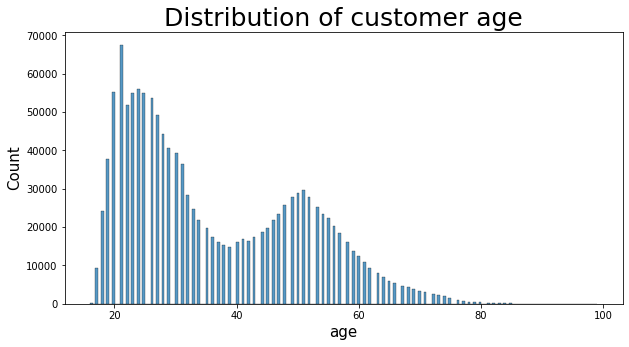

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(x='age', data=df_customers)#, bins=30)
plt.title(label='Distribution of customer age', fontsize=25)
plt.xlabel(xlabel='age' , fontsize=15)
plt.ylabel(ylabel= 'Count', fontsize=15)

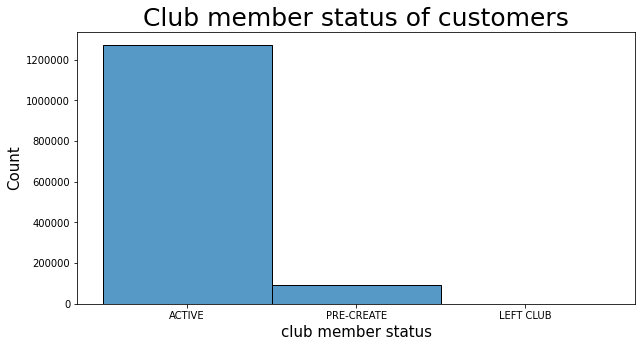

In [21]:
plt.figure(figsize=(10,5))
sns.histplot(x='club_member_status', data=df_customers)
plt.title(label='Club member status of customers', fontsize=25)
plt.xlabel(xlabel='club member status' , fontsize=15)
plt.ylabel(ylabel= 'Count', fontsize=15)
# turning off the scientific notation on the y-axis
plt.ticklabel_format(style='plain', axis='y')

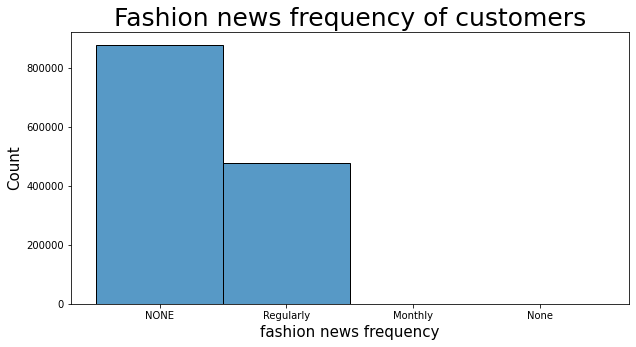

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(x='fashion_news_frequency', data=df_customers)
plt.title(label='Fashion news frequency of customers', fontsize=25)
plt.xlabel(xlabel='fashion news frequency' , fontsize=15)
plt.ylabel(ylabel= 'Count', fontsize=15)
# turning off the scientific notation on the y-axis
plt.ticklabel_format(style='plain', axis='y')

In [23]:
cols = df_transactions.columns
print(cols)

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id'], dtype='object')


In [24]:
#df_transactions['t_dat'].head(30)
#df_transactions['t_dat'].tail(30)
df_transactions['article_id'].nunique()

104547

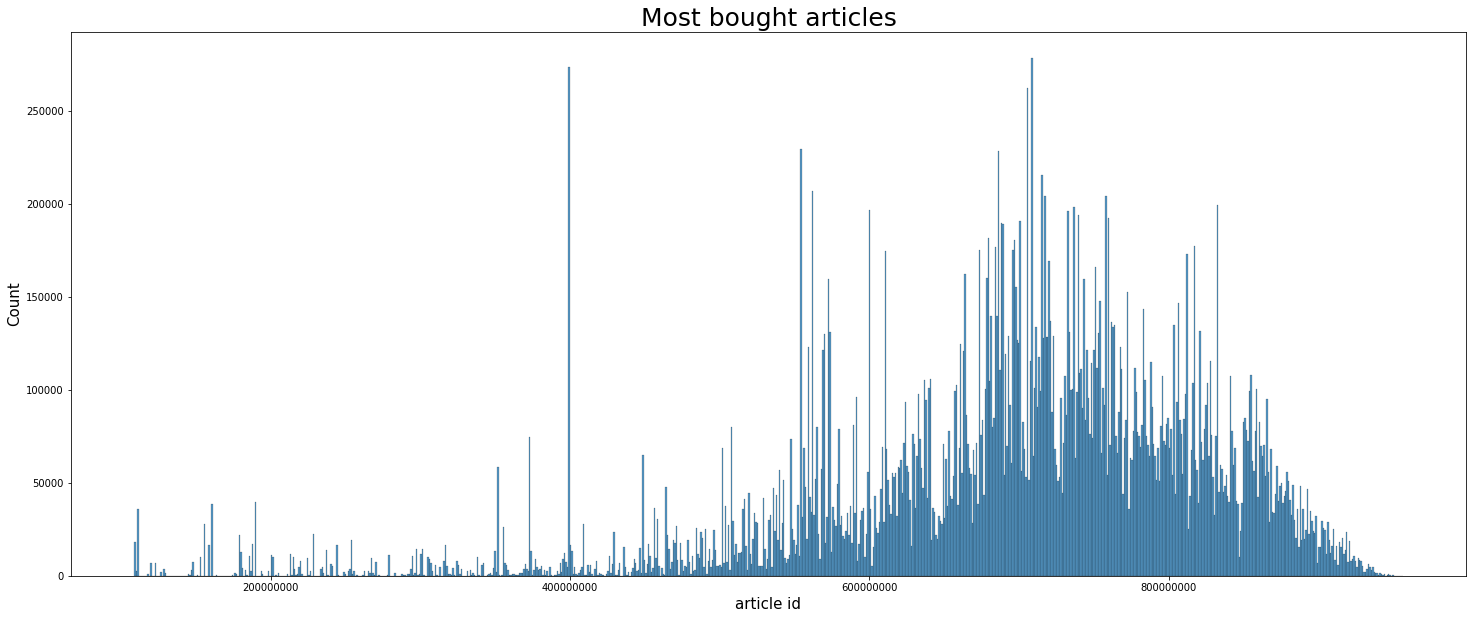

In [25]:
plt.figure(figsize=(25,10))
sns.histplot(x='article_id', data=df_transactions)
plt.title(label='Most bought articles', fontsize=25)
plt.xlabel(xlabel='article id' , fontsize=15)
plt.ylabel(ylabel= 'Count', fontsize=15)
# turning off the scientific notation on the y-axis
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

In [26]:
list_of_articles = df_transactions.article_id.value_counts()
print(list_of_articles)

706016001    50287
706016002    35043
372860001    31718
610776002    30199
759871002    26329
             ...  
520736002        1
619777003        1
586904003        1
512385003        1
533261032        1
Name: article_id, Length: 104547, dtype: int64


In [27]:
df_transactions.article_id.mode()

0    706016001
Name: article_id, dtype: int64

In [28]:
#df_transactions.merge(df_transactions.article_id)

In [34]:
list_of_fifty_best = df_transactions['article_id'].value_counts()[:50].index.tolist()
#list_of_fifty_best